MAE: 48348.9466371085
MSE: 4457823946.623412
R2 Score: 0.03459469496622403
Predicted Crop Yield for 2026: 97121.32542039175


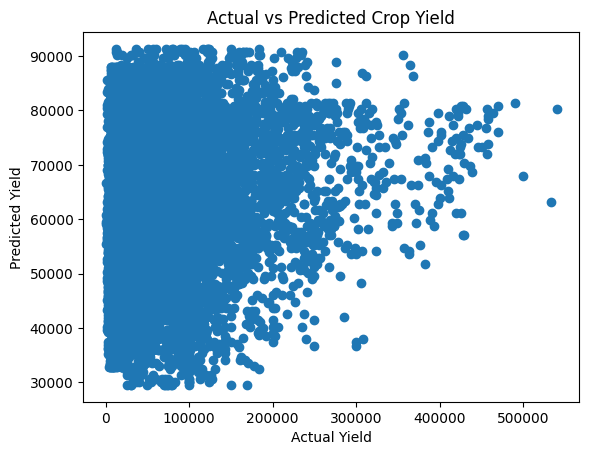

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# Load Dataset
# ---------------------------
data = pd.read_csv("yield.csv.csv")

# Clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

# ---------------------------
# Filter only Yield data
# ---------------------------
yield_data = data[data['element'].str.lower() == 'yield'].copy()

# Remove missing values
yield_data = yield_data.dropna()

# ---------------------------
# Encode crop type (item)
# ---------------------------
yield_data['item_code_encoded'] = yield_data['item'].astype('category').cat.codes

# ---------------------------
# Features & Target
# ---------------------------
X = yield_data[['year', 'item_code_encoded']]
y = yield_data['value']   # Crop Yield

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Train Model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# Predictions
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ---------------------------
# Predict Future Yield (Example)
# ---------------------------
new_data = pd.DataFrame({
    'year': [2026],
    'item_code_encoded': [0]  # Example crop
})

predicted_yield = model.predict(new_data)
print("Predicted Crop Yield for 2026:", predicted_yield[0])

# ---------------------------
# Visualization
# ---------------------------
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.show()
plt.savefig("actual_vs_predicted.png")

